In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
forestfire=pd.read_csv("forestfires.csv")

In [3]:
forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
inputs=forestfire.iloc[:,2:30]
target=forestfire.iloc[:,30]

In [5]:
target

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [6]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.4,stratify = target)

In [7]:
l_e=LabelEncoder()
o_e=OrdinalEncoder()

In [8]:
x_train=o_e.fit_transform(x_train)
x_test=o_e.fit_transform(x_test)

y_train=l_e.fit_transform(y_train)
y_test=l_e.fit_transform(y_test)

In [9]:
model_linear=SVC(kernel="linear")
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [10]:
pred=model_linear.predict(x_test)

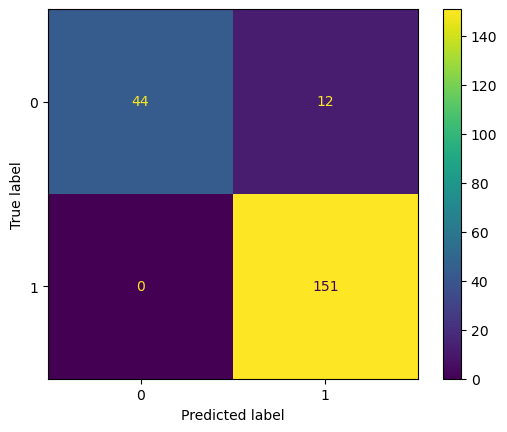

In [11]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,pred))
cm.plot()

In [12]:
np.mean(pred==y_test)

0.9420289855072463

In [13]:
pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1])

In [14]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        56
           1       0.93      1.00      0.96       151

    accuracy                           0.94       207
   macro avg       0.96      0.89      0.92       207
weighted avg       0.95      0.94      0.94       207



In [15]:
model_poly=SVC(kernel="poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [16]:
pred_poly=model_poly.predict(x_test)

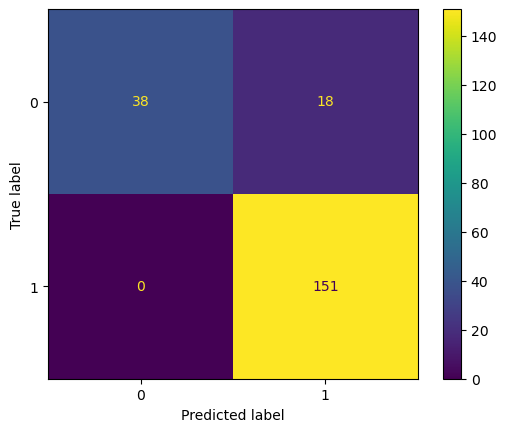

In [17]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,pred_poly))
cm.plot()

In [18]:
print(classification_report(y_test,pred_poly))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        56
           1       0.89      1.00      0.94       151

    accuracy                           0.91       207
   macro avg       0.95      0.84      0.88       207
weighted avg       0.92      0.91      0.91       207



In [19]:
salary_train=pd.read_csv("SalaryData_Train(1).csv")
salary_test=pd.read_csv("SalaryData_Test(1).csv")

In [20]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [21]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [22]:
salary_train["Salary"].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [23]:
x_train=salary_train.iloc[:,:-1]
y_train=salary_train.iloc[:,-1]
x_test=salary_test.iloc[:,:-1]
y_test=salary_test.iloc[:,-1]

In [24]:
l_e=LabelEncoder()
o_e=OrdinalEncoder()

In [25]:
x_train=o_e.fit_transform(x_train)
x_test=o_e.fit_transform(x_test)

y_train=l_e.fit_transform(y_train)
y_test=l_e.fit_transform(y_test)

In [26]:
x_train

array([[22.,  5.,  9., ...,  0., 39., 37.],
       [33.,  4.,  9., ...,  0., 12., 37.],
       [21.,  2., 11., ...,  0., 39., 37.],
       ...,
       [41.,  2., 11., ...,  0., 39., 37.],
       [ 5.,  2., 11., ...,  0., 19., 37.],
       [35.,  3., 11., ...,  0., 39., 37.]])

In [27]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [28]:
scale=MinMaxScaler(feature_range=(0,1)).fit(x_train)
x_train=scale.transform(x_train)


In [29]:
scale=MinMaxScaler(feature_range=(0,1)).fit(x_test)
x_test=scale.transform(x_test)

In [30]:
model_linear=SVC(kernel="linear")
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [31]:
pred=model_linear.predict(x_test)

In [32]:
pred

array([0, 0, 0, ..., 0, 1, 0])

In [33]:
np.mean(pred==y_test)

0.8034528552456839

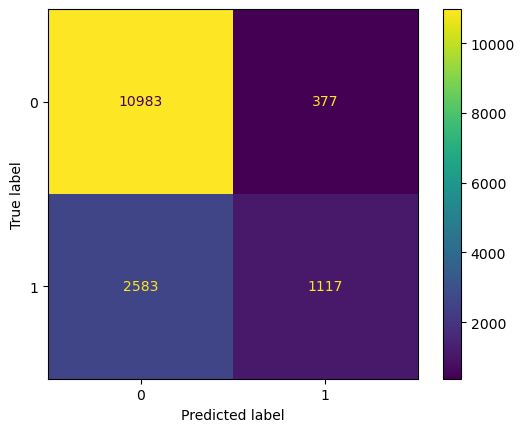

In [34]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,pred))
cm.plot()

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11360
           1       0.75      0.30      0.43      3700

    accuracy                           0.80     15060
   macro avg       0.78      0.63      0.66     15060
weighted avg       0.79      0.80      0.77     15060



In [36]:
model_poly=SVC(kernel="poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [37]:
pred_poly=model_poly.predict(x_test)

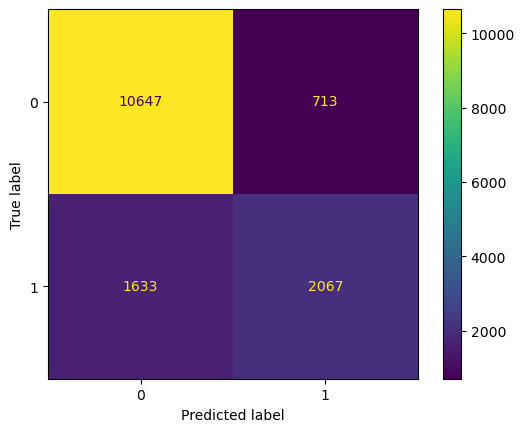

In [38]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,pred_poly))
cm.plot()

In [39]:
np.mean(pred_poly==y_test)

0.8442231075697211

In [40]:
print(classification_report(y_test,pred_poly))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.74      0.56      0.64      3700

    accuracy                           0.84     15060
   macro avg       0.81      0.75      0.77     15060
weighted avg       0.84      0.84      0.84     15060



In [41]:
model_sigmoid=SVC(kernel="sigmoid")
model_sigmoid.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [42]:
pred_sigmoid=model_sigmoid.predict(x_test)

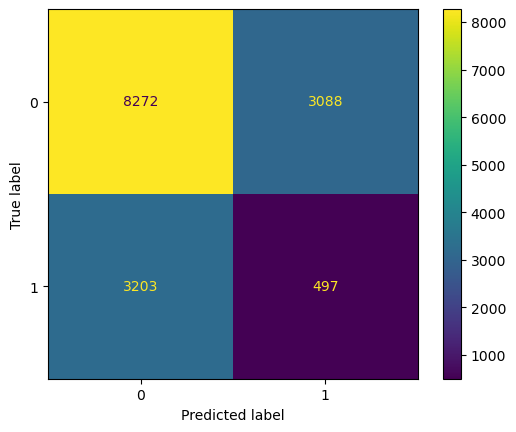

In [43]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,pred_sigmoid))
cm.plot()

In [44]:
print(classification_report(y_test,pred_sigmoid))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72     11360
           1       0.14      0.13      0.14      3700

    accuracy                           0.58     15060
   macro avg       0.43      0.43      0.43     15060
weighted avg       0.58      0.58      0.58     15060



In [45]:
model_rbf=SVC(kernel="rbf")
model_rbf.fit(x_train,y_train)

SVC()

In [46]:
pred_rbf=model_rbf.predict(x_test)

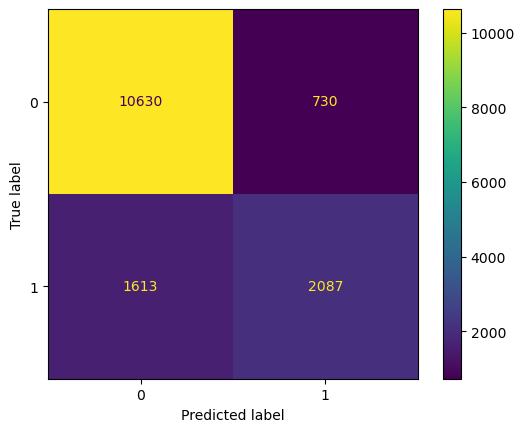

In [47]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,pred_rbf))
cm.plot()

In [48]:
print(classification_report(y_test,pred_rbf))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.74      0.56      0.64      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.75      0.77     15060
weighted avg       0.84      0.84      0.84     15060

